**Experiment 1A**

              POPTHM
DATE                
1959-01-01  175818.0
1959-02-01  176044.0
1959-03-01  176274.0
1959-04-01  176503.0
1959-05-01  176723.0


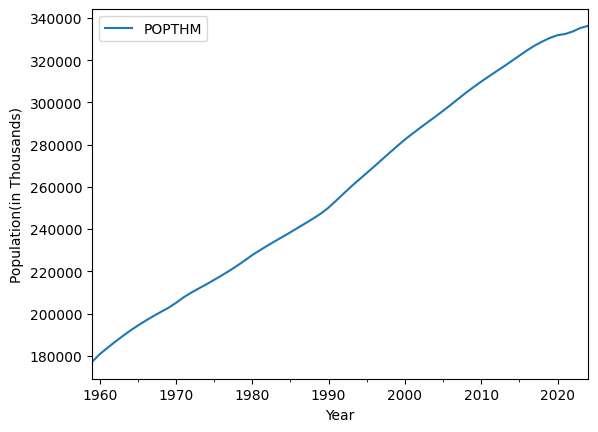

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/POPTHM.csv", parse_dates=["DATE"], index_col="DATE")

print(df.head())
df.loc["2017-01"]
df.loc["2017"].mean()
df.loc["2017-05":"2017-06"]
df.resample('Y').mean()
mean=df.resample('Y').mean().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Population(in Thousands)")
plt.show()


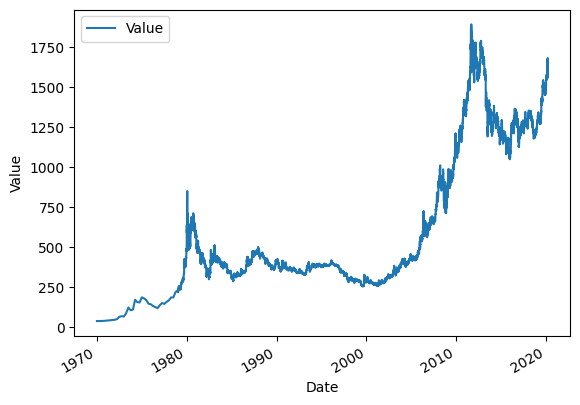

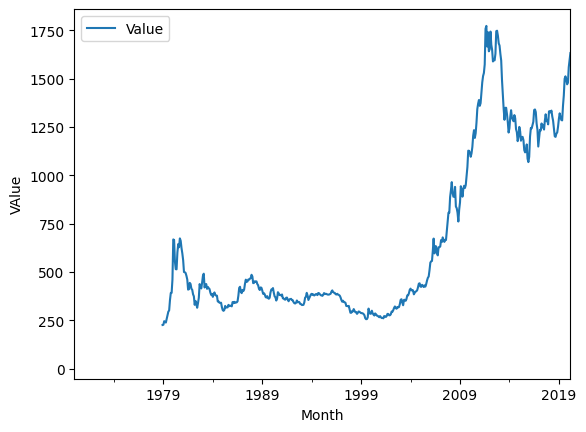

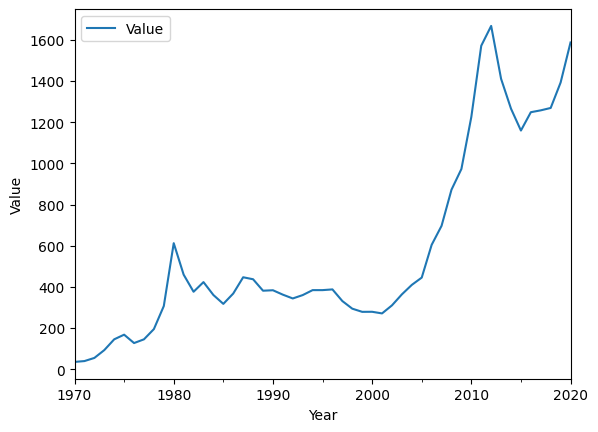

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("gold_price_data.csv",parse_dates=["Date"],index_col="Date")
df.head()
df.loc["2017-01"]
df.loc["2017-01"].mean()
df.loc["2017-05-01":"2017-08-31"]
df.resample('M').mean()
df.plot(kind='line')
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
mean=df.resample('M').mean().plot(kind='line')
plt.xlabel("Month")
plt.ylabel("VAlue")
plt.show()
mean=df.resample('Y').mean().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()


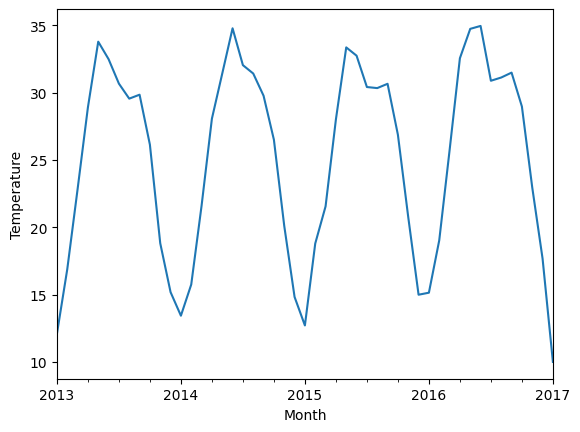

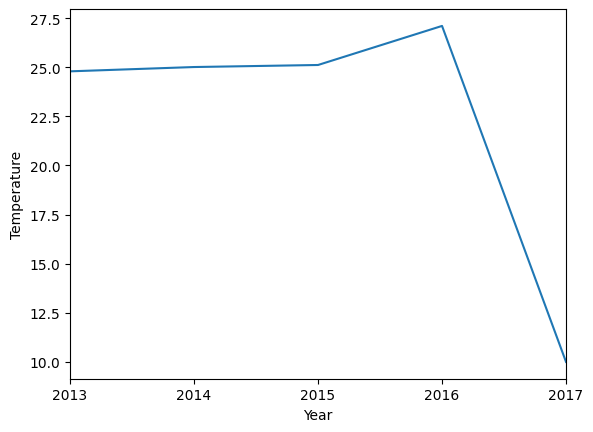

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("/content/DailyDelhiClimateTrain.csv",parse_dates=["date"],index_col="date")
df.head()
df.loc["2017-01"]
df.loc["2017"].mean()
df.loc["2017-05-01":"2015-08-31"]
df['meantemp'].resample('M').mean()
mean=df["meantemp"].resample('M').mean().plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()
mean=df["meantemp"].resample('Y').mean().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()


**Experiment 1B**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv('Electric_Production.csv')
train['DATE'] = pd.to_datetime(train['DATE'], format='%d/%m/%Y')
train.head()

DATE  IPG2211A2N
0 1985-01-01     72.5052
1 1985-01-02     70.6720
2 1985-01-03     62.4502
3 1985-01-04     57.4714
4 1985-01-05     55.3151

In [21]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used'
               ,'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(train['IPG2211A2N'])
train['DATE'] = pd.to_datetime(train['DATE'], format='%d/%m/%Y')
train['Year'] = train['DATE'].dt.year


Results of Dickey-Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


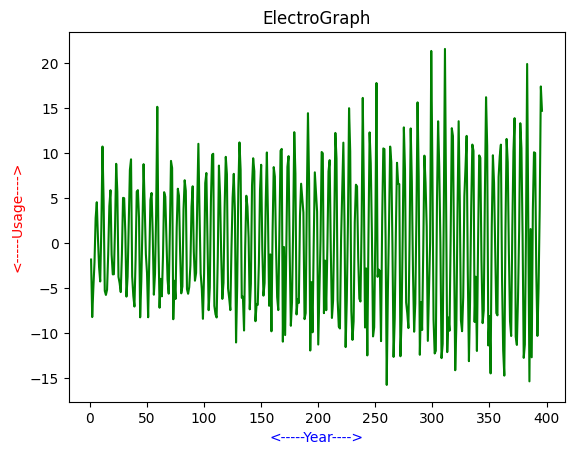

In [24]:
train['IPG2211A2N_diff'] = train['IPG2211A2N'] - train['IPG2211A2N'].shift(1)
train['IPG2211A2N_diff'].dropna().plot(color='green')
plt.title("ElectroGraph")
plt.xlabel("<-----Year---->",color='blue')
plt.ylabel("<-----Usage---->",color='red')
plt.show()
plt.show()

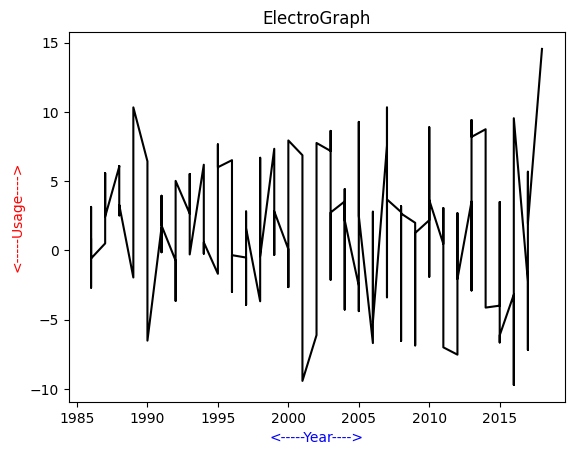

In [25]:
data=train
data['SeasonalAdjustment'] = data.iloc[:,1] - data.iloc[:,1].shift(12)
data['SeasonalAdjustment'].dropna()
x=data['Year']
y=data["SeasonalAdjustment"]
plt.plot(x,y,color='black')
plt.title("ElectroGraph")
plt.xlabel("<-----Year---->",color='blue')
plt.ylabel("<-----Usage---->",color='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


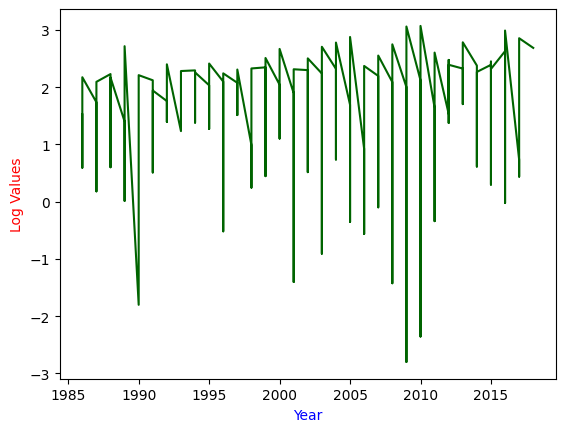

In [26]:
data1=train
data1['log']=np.log(data1['IPG2211A2N_diff']).dropna()
data1=data1.dropna()
x=data1['Year']
y=data1['log']
plt.xlabel('Year',color='blue')
plt.ylabel('Log Values',color='red')
plt.plot(x,y,color='darkgreen')